In [211]:
import pandas as pd
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing
%matplotlib inline

# 读取数据

## PMI

In [212]:
macro_df = pd.read_excel('./data/scenario.xlsx', sheetname='macro')

In [213]:
macro_df.head()

,工业增加值
1991-01-31,23.5
1991-02-28,9.2
1991-03-31,10.9
1991-04-30,10.9
1991-05-31,10.9


## CPI

In [214]:
inflation_df = pd.read_excel('./data/scenario.xlsx', sheetname='inflation')

In [215]:
inflation_df.head()

,CPI
1991-01-31,2.2
1991-02-28,1.0
1991-03-31,1.6
1991-04-30,1.3
1991-05-31,3.6


## M2

In [216]:
money_df = pd.read_excel('./data/scenario.xlsx', sheetname='money')

In [217]:
money_df.head()

,M2
1996-01-31,25.9
1996-02-29,27.2
1996-03-31,28.3
1996-04-30,28.5
1996-05-31,28.4


## commodity

In [218]:
# commodity_df = pd.read_excel('./data/scenario.xlsx', sheetname='commodity')

In [219]:
# commodity_df.head()

## currency

In [220]:
currency_df = pd.read_excel('./data/scenario.xlsx', sheetname='currency')

In [221]:
currency_df.head()

,CNY
1991-01-02,5.2352
1991-01-03,5.2352
1991-01-04,5.2352
1991-01-07,5.2352
1991-01-08,5.2352


## bond

In [224]:
# bond_df = pd.read_excel('./data/scenario.xlsx', sheetname='interest rate')

In [225]:
# bond_df.head()

## stock/commodity price

In [227]:
price_df = pd.read_excel('./data/scenario.xlsx', sheetname='price')

In [228]:
price_df.head()

,881001.WI,000001.SH,CCFI.WI
1991-01-02,0.0,128.84,0.0
1991-01-03,0.0,130.14,0.0
1991-01-04,0.0,131.44,0.0
1991-01-07,0.0,132.06,0.0
1991-01-08,0.0,132.68,0.0


In [462]:
df = macro_df
df['CPI'] = inflation_df['CPI']
df['M2'] = money_df['M2']

In [463]:
df.head()

,工业增加值,CPI,M2,stock,currency,commodity
1991-01-31,23.5,2.2,NaN,129.97,5.2352,0.0
1991-02-28,9.2,1.0,NaN,133.01,5.2352,0.0
1991-03-31,10.9,1.6,NaN,120.19,5.2352,0.0
1991-04-30,10.9,1.3,NaN,113.94,5.3036,0.0
1991-05-31,10.9,3.6,NaN,114.83,5.3490,0.0


In [464]:
df['stock'] = price_df['000001.SH'].resample('M').last()
# df['CGB1Y'] = bond_df['CGB1Y'].resample('M').last()
# df['CGB10Y'] = bond_df['CGB10Y'].resample('M').last()
df['currency'] = currency_df['CNY'].resample('M').last()
# df['commodity'] = commodity_df[u'南华综合指数'].resample('M').last()
df['commodity'] = price_df['CCFI.WI'].resample('M').last()

In [465]:
df.head()

,工业增加值,CPI,M2,stock,currency,commodity
1991-01-31,23.5,2.2,NaN,129.97,5.2352,0.0
1991-02-28,9.2,1.0,NaN,133.01,5.2352,0.0
1991-03-31,10.9,1.6,NaN,120.19,5.2352,0.0
1991-04-30,10.9,1.3,NaN,113.94,5.3036,0.0
1991-05-31,10.9,3.6,NaN,114.83,5.3490,0.0


In [466]:
df.dropna().head()

,工业增加值,CPI,M2,stock,currency,commodity
1996-01-31,16.9,9.0,25.9,537.35,8.3138,879.0336
1996-02-29,12.2,9.3,27.2,552.94,8.3211,879.0733
1996-03-31,12.2,9.8,28.3,556.39,8.3338,859.4159
1996-04-30,13.7,9.7,28.5,681.16,8.3301,859.7720
1996-05-31,13.1,8.9,28.4,643.65,8.3255,825.8901


In [467]:
df = df.dropna()

In [468]:
df.head()

,工业增加值,CPI,M2,stock,currency,commodity
1996-01-31,16.9,9.0,25.9,537.35,8.3138,879.0336
1996-02-29,12.2,9.3,27.2,552.94,8.3211,879.0733
1996-03-31,12.2,9.8,28.3,556.39,8.3338,859.4159
1996-04-30,13.7,9.7,28.5,681.16,8.3301,859.7720
1996-05-31,13.1,8.9,28.4,643.65,8.3255,825.8901


In [469]:
df.tail()

,工业增加值,CPI,M2,stock,currency,commodity
2017-07-31,6.4,1.4,9.2,3273.0283,6.7290,1079.1805
2017-08-31,6.0,1.8,8.9,3360.8103,6.5969,1144.5317
2017-09-30,6.6,1.6,9.2,3348.9431,6.6470,1074.0576
2017-10-31,6.2,1.9,8.8,3393.3417,6.6272,1058.4740
2017-11-30,6.1,1.7,9.1,3392.3988,6.6107,1084.4450


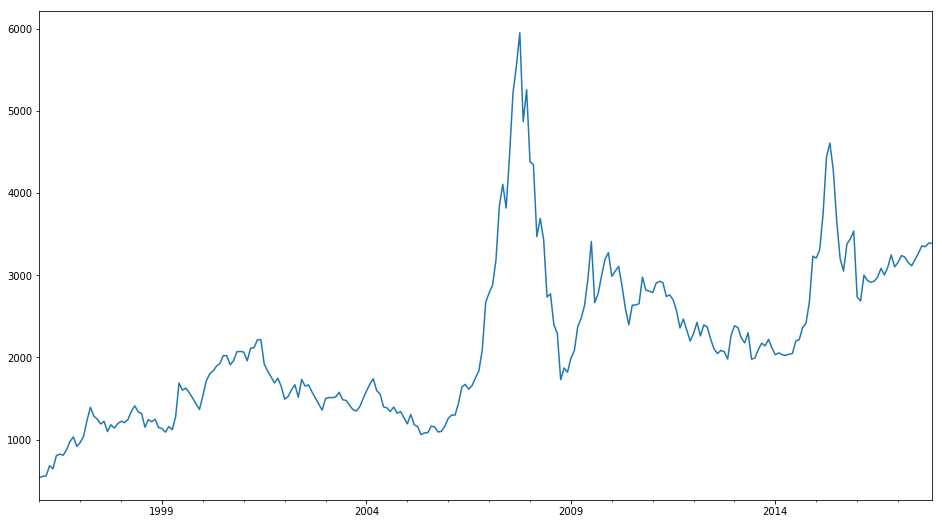

In [470]:
plt.figure(figsize=(16, 9))
df['stock'].plot()

# 标准化

In [727]:
X = pd.DataFrame(index=df.index, columns=df.columns)
for date in df.index:
    past = df[df.index <= date]
    X.loc[date] = (df.loc[date] - past.mean()) / past.std()

In [728]:
X = X.loc[X.index[24:]]

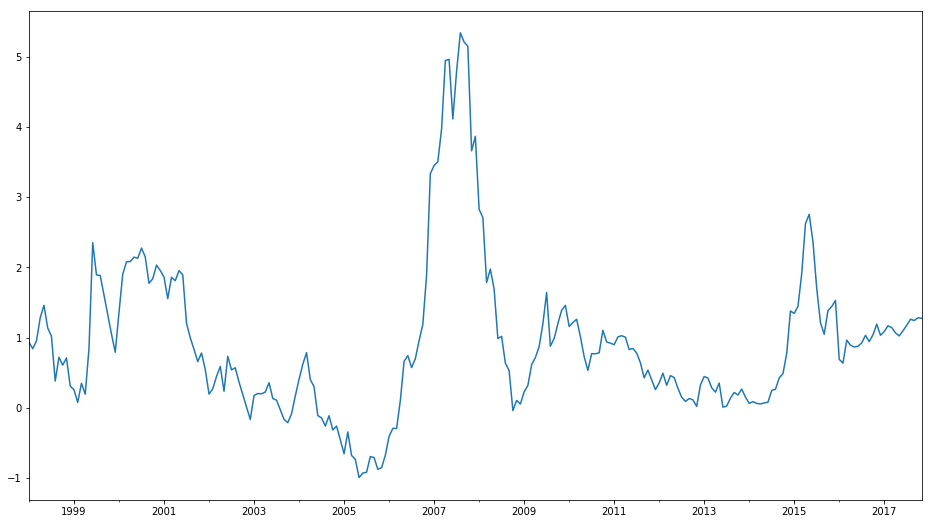

In [729]:
plt.figure(figsize=(16, 9))
X['stock'].plot()

# 提取场景数据

In [730]:
# scenario = df[((df.index >= '2006-01-01') & (df.index <= '2006-06-01')) |
#              ((df.index >= '2009-01-01') & (df.index <= '2009-09-01')) | 
#              ((df.index >= '2010-07-01') & (df.index <= '2011-01-01'))]

In [768]:
scenario = X[#((X.index >= '2004-01-01') & (X.index <= '200606-01')) |
             #((X.index >= '2009-01-01') & (X.index <= '2009-09-01')) | 
             ((X.index >= '2010-07-01') & (X.index <= '2011-01-01'))]

In [769]:
scenario

,工业增加值,CPI,M2,stock,currency,commodity
2010-07-31,0.0369935,0.44209,-0.138326,0.771217,-2.16524,1.36191
2010-08-31,0.149267,0.508283,0.235077,0.769035,-2.07367,1.47869
2010-09-30,0.0136014,0.540385,0.17829,0.782567,-2.24556,1.63544
2010-10-31,-0.0316477,0.809779,0.257453,1.10408,-2.24308,1.83936
2010-11-30,0.0137803,1.04291,0.30367,0.937969,-2.21234,1.76957
2010-12-31,0.0592102,0.867796,0.354553,0.920909,-2.30642,2.24106


# 提取特征值、特征向量

In [770]:
# centered_matrix = scenario - scenario.mean(axis=0)
# cov = np.dot(centered_matrix.T, centered_matrix)
# eigvals, eigvecs = np.linalg.eig(cov)
data = scenario - scenario.mean(axis=0)
R = np.cov(data.astype(float), rowvar=False)
evals, evecs = np.linalg.eigh(R)
idx = np.argsort(evals)[::-1]
evecs = evecs[:,idx]
evals = evals[idx]

In [771]:
evals.cumsum() / evals.sum()

array([ 0.79045282,  0.89408317,  0.95982714,  0.99005833,  1.        ,  1.        ])

# 将原数据映射到特征向量空间下（降维）

In [772]:
K = 3
# evecs = evecs[:, :K]
X_tran = np.dot(evecs[:, :K].T, X.T)

In [773]:
trans_df = pd.DataFrame(X_tran.T, index=X.index, columns=range(1,K+1))

In [774]:
trans_df.head()

,1,2,3
1998-01-31,-1.771,-0.528637,2.87498
1998-02-28,-1.91468,-0.0224958,1.79385
1998-03-31,-1.63452,-0.168863,2.032
1998-04-30,-1.71007,-0.267719,2.42444
1998-05-31,-1.90669,-0.422432,2.07504


0.94381683639872682

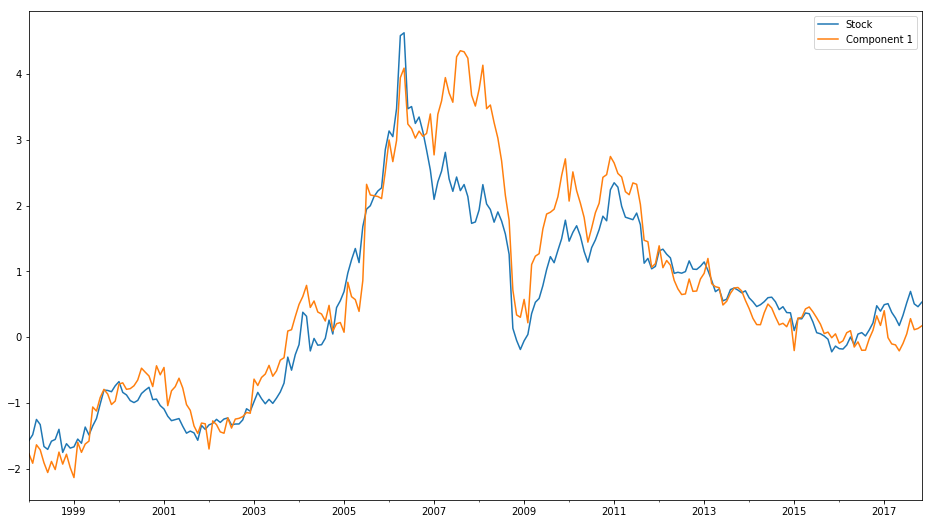

In [775]:
plt.figure(figsize=(16, 9))
X['commodity'].plot(label='Stock')
trans_df[1].plot(label='Component 1')
# trans_df[2].plot(label='Component 2')
plt.legend()
X['commodity'].astype(float).corr(trans_df[1].astype(float))

# 计算各时点到该场景的距离

In [776]:
lambdas = evals[:K]
lambdas = lambdas / lambdas.sum()

In [777]:
lambdas

array([ 0.82353664,  0.10796773,  0.06849563])

In [781]:
# F_score = np.dot(trans_df, lambdas)
F_score = trans_df.mean(axis=1)
# F_score = trans_df.sum(axis=1)

In [782]:
Fdf = pd.DataFrame({'F': F_score, 
                    'stock': X['stock'],
                    'commodity': X['commodity']}, index=X.index)

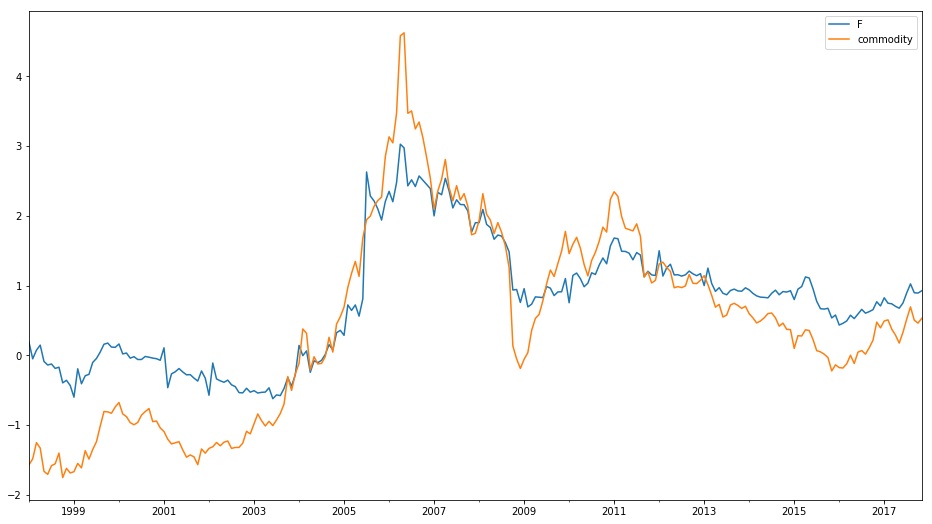

In [783]:
plt.figure(figsize=(16, 9))
Fdf['F'].plot(legend=True)
Fdf['commodity'].plot(legend=True)
# (1+Fdf['commodity'].pct_change()).cumprod().plot(legend=True)
# Fdf[(Fdf.index >= '2009-01-01') & (Fdf.index <= '2009-09-01')]['F'].plot(c='r', linewidth=3.)
# Fdf[(Fdf.index >= '2010-07-01') & (Fdf.index <= '2011-01-01')]['F'].plot(c='r', linewidth=3.)
# X_tran[1].plot(label='Component 1')
plt.legend()